<a href="https://colab.research.google.com/github/Dharitri-2022ds/EDA-Global-Terrorism-Analysis-/blob/main/Almabetter_Capstone_Module2_EDA_of_Global_terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Global Terrorism Analysis**


##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**
The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017.

The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks.

The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

Write the summary here within 500-600 words.

# **GitHub Link -**


https://github.com/Dharitri-2022ds/EDA-Global-Terrorism-Analysis-

# **Problem Statement**




In this project I am going to analyse Global Terrorism dataset.
This dataset contains information about various terrorist activities and attacks, such as location, date, type of attack, target, number of casualities, and more.

#### **Define Your Business Objective?**

The objective of this project is to explore and analyze the data to gain insights and generate visualisations that can help us better understand the nature and trends of global terrorism.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import missingno as msno
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


### Dataset Loading

In [2]:
# Load Dataset
#Mount google drive for accessing the dataset of Global Terrorism
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#File path of Global Terrorism dataset in google drive
drive.mount("/content/drive", force_remount=True)

file_path = "/content/drive/MyDrive/Colab Notebooks/Global Terrorism Data.csv"
df = pd.read_csv(file_path,encoding='latin-1')

Mounted at /content/drive


<ipython-input-3-9cc5b2b3a5db>:5: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path,encoding='latin-1')


### Dataset First View

In [4]:
# Dataset First Look
df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


Here we can see the first 5 rows of the dataset. Similarly, we can also view the last 5 rows of the dataset.

In [5]:
df.tail(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(181691, 135)

Number of rows in the dataset is 181691.
Number of columns in the dataset is 135.

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])


0

Number of duplicate value count: 0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
print(df.isnull().sum())

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64


### What did you know about your dataset?
 This dataset contains 181691 number of rows and 135 number of columns with zero duplicate values.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [11]:
# Dataset Describe
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


# Variables Description

**eventid:** A unique identifier for each incident.

**iyear:** The year in which the incident occurred.

**imonth and iday:** The month and the day in which the incident occurred respectively.

**country and region:** The country and region where the incident occurred.

**provstate:** The province or state where the incident took place.

**city:** The city where the incident occurred.

**latitude and longitude:** Geographic coordinates of the incident.

**specificity:** Indicates the level of geographic specificity(e.g. city, region) of the incident's location.

**Attack information:**

**attacktype1,attacktype2,attacktype3:** The primary, secondary, and tertiary attack types, categorizing the nature of the attack(assassination, bombing, hijacking).

**weaptype1,weaptype2,weaptype3:** The primary, secondary, and tertiary weapon types(e.g. explosives, firearms, chemical weapons).

**Target information:**

**targtype1,targtype2,targtype3:** The primary, secondary, and tertiary target types of the attack(e.g.civilians, military, govt)

**nkill:** The number of confirmed fatalitites in the incident.

**nwound:** The number of confirmed injuries in the incident.

**nkillter:**The number of perpetrators killed during the incident.

**Perpetrator information:**

**ngame:** The name of the group responsible for the attack.

**motive:** The perceived motive behind the attack.

**guncertain1,guncertain2,guncertain3:** Indicates whether the responsible group is uncertain for the primary, secondary, and tertiary groups involved.

**Information:**

**Summary:** A narrative desription of the incident.

**dbsource:** The source of the data for the incident.

**related:** Indicates if there is anpther incident in the database.

**propextent:** Extent of property damage(e.g.,unknown, major, minor).

**propvalue:** Value of the property.

**ishostkid:** Indicates whether hostages were taken during the incident.

**Miscellaneous information:**

**ransom:** Indicates if a ransom was demanded or paid.

**ransompaid:**  Amount of ransom paid, if applicable.

**hostidoutcome:** hostage-taking incident.




### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  eventid is 181691 .
No. of unique values in  iyear is 47 .
No. of unique values in  imonth is 13 .
No. of unique values in  iday is 32 .
No. of unique values in  approxdate is 2244 .
No. of unique values in  extended is 2 .
No. of unique values in  resolution is 1859 .
No. of unique values in  country is 205 .
No. of unique values in  country_txt is 205 .
No. of unique values in  region is 12 .
No. of unique values in  region_txt is 12 .
No. of unique values in  provstate is 2855 .
No. of unique values in  city is 36673 .
No. of unique values in  latitude is 48322 .
No. of unique values in  longitude is 48039 .
No. of unique values in  specificity is 5 .
No. of unique values in  vicinity is 3 .
No. of unique values in  location is 44109 .
No. of unique values in  summary is 112492 .
No. of unique values in  crit1 is 2 .
No. of unique values in  crit2 is 2 .
No. of unique values in  crit3 is 2 .
No. of unique values in  doubtterr is 3 .
No. of unique values in  

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
null_sum= (df.isnull().sum()/len(df)) * 100
percent_null= null_sum.sort_values(ascending=False)
type(percent_null)

high_null_column= percent_null[percent_null > 50]

less_than_50_null_column= percent_null[~percent_null.isin(high_null_column)]

print(f'Number of columns with less than 50% missing values: {len(less_than_50_null_column)}')
less_null_column= less_than_50_null_column.index.tolist()
print(less_null_column)

Number of columns with less than 50% missing values: 58
['nperps', 'nperpcap', 'nwoundte', 'weapdetail', 'nkillter', 'scite1', 'summary', 'claimed', 'nwoundus', 'nkillus', 'corp1', 'weapsubtype1', 'weapsubtype1_txt', 'nwound', 'targsubtype1', 'targsubtype1_txt', 'nkill', 'longitude', 'latitude', 'natlty1', 'natlty1_txt', 'target1', 'city', 'provstate', 'guncertain1', 'ishostkid', 'specificity', 'doubtterr', 'multiple', 'crit1', 'iyear', 'iday', 'imonth', 'targtype1_txt', 'gname', 'individual', 'dbsource', 'country', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY', 'extended', 'region_txt', 'country_txt', 'region', 'crit2', 'targtype1', 'weaptype1', 'weaptype1_txt', 'attacktype1_txt', 'attacktype1', 'vicinity', 'suicide', 'success', 'crit3', 'property', 'eventid']


In [14]:
new_df = df[less_null_column]


In [15]:
check= new_df.columns.tolist()

In [16]:
selected_columns_1 = ['eventid','iyear','imonth','iday','country_txt','region_txt','city','multiple','success','suicide','attacktype1_txt','targtype1_txt','targsubtype1_txt','corp1','target1','natlty1_txt','weaptype1_txt','nkill','nwoundus','claimed','individual','INT_LOG','doubtterr','INT_MISC','specificity','gname','ishostkid','INT_ANY','guncertain1','provstate']

In [17]:
len(check)-len(selected_columns_1)

28

In [18]:
print(list((set(check)) - (set(selected_columns_1))))

['weaptype1', 'vicinity', 'nkillter', 'weapsubtype1', 'natlty1', 'summary', 'weapsubtype1_txt', 'extended', 'scite1', 'region', 'targsubtype1', 'country', 'nperpcap', 'longitude', 'INT_IDEO', 'latitude', 'nwoundte', 'weapdetail', 'nperps', 'nwound', 'crit3', 'nkillus', 'crit2', 'property', 'attacktype1', 'dbsource', 'targtype1', 'crit1']


In [19]:
df_1= df[selected_columns_1]
df_1.T

,0,1,2,3,4,5,6,7,8,9,...,181681,181682,181683,181684,181685,181686,181687,181688,181689,181690
eventid,197000000001,197000000002,197001000001,197001000002,197001000003,197001010002,197001020001,197001020002,197001020003,197001030001,...,201712310016,201712310017,201712310018,201712310019,201712310020,201712310022,201712310029,201712310030,201712310031,201712310032
iyear,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
imonth,7,0,1,1,1,1,1,1,1,1,...,12,12,12,12,12,12,12,12,12,12
iday,2,0,0,0,0,1,2,2,2,3,...,31,31,31,31,31,31,31,31,31,31
country_txt,Dominican Republic,Mexico,Philippines,Greece,Japan,United States,Uruguay,United States,United States,United States,...,Philippines,Italy,Afghanistan,India,Afghanistan,Somalia,Syria,Philippines,India,Philippines
region_txt,Central America & Caribbean,North America,Southeast Asia,Western Europe,East Asia,North America,South America,North America,North America,North America,...,Southeast Asia,Western Europe,South Asia,South Asia,South Asia,Sub-Saharan Africa,Middle East & North Africa,Southeast Asia,South Asia,Southeast Asia
city,Santo Domingo,Mexico city,Unknown,Athens,Fukouka,Cairo,Montevideo,Oakland,Madison,Madison,...,Shariff Aguak,Spinetoli,Kohistan district,Hungrum,Maymana,Ceelka Geelow,Jableh,Kubentog,Imphal,Cotabato City
multiple,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
success,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,0,0
suicide,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
(df_1.isnull().sum()/len(df_1))*100

eventid              0.000000
iyear                0.000000
imonth               0.000000
iday                 0.000000
country_txt          0.000000
region_txt           0.000000
city                 0.239417
multiple             0.000550
success              0.000000
suicide              0.000000
attacktype1_txt      0.000000
targtype1_txt        0.000000
targsubtype1_txt     5.709144
corp1               23.419982
target1              0.351146
natlty1_txt          0.858050
weaptype1_txt        0.000000
nkill                5.676120
nwoundus            35.611010
claimed             36.391456
individual           0.000000
INT_LOG              0.000000
doubtterr            0.000550
INT_MISC             0.000000
specificity          0.003302
gname                0.000000
ishostkid            0.097969
INT_ANY              0.000000
guncertain1          0.209146
provstate            0.231712
dtype: float64

In [21]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   country_txt       181691 non-null  object 
 5   region_txt        181691 non-null  object 
 6   city              181256 non-null  object 
 7   multiple          181690 non-null  float64
 8   success           181691 non-null  int64  
 9   suicide           181691 non-null  int64  
 10  attacktype1_txt   181691 non-null  object 
 11  targtype1_txt     181691 non-null  object 
 12  targsubtype1_txt  171318 non-null  object 
 13  corp1             139139 non-null  object 
 14  target1           181053 non-null  object 
 15  natlty1_txt       180132 non-null  object 
 16  weaptype1_txt     18

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1- **Counting Terrorist Attack Per Year**

In [22]:
# Chart - 1 visualization code
#Calculate attacks per year
attack_per_year = df_1['iyear'].value_counts().sort_index()


<ipython-input-23-a28cf79a4a75>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='iyear', data=df_1,palette='viridis')


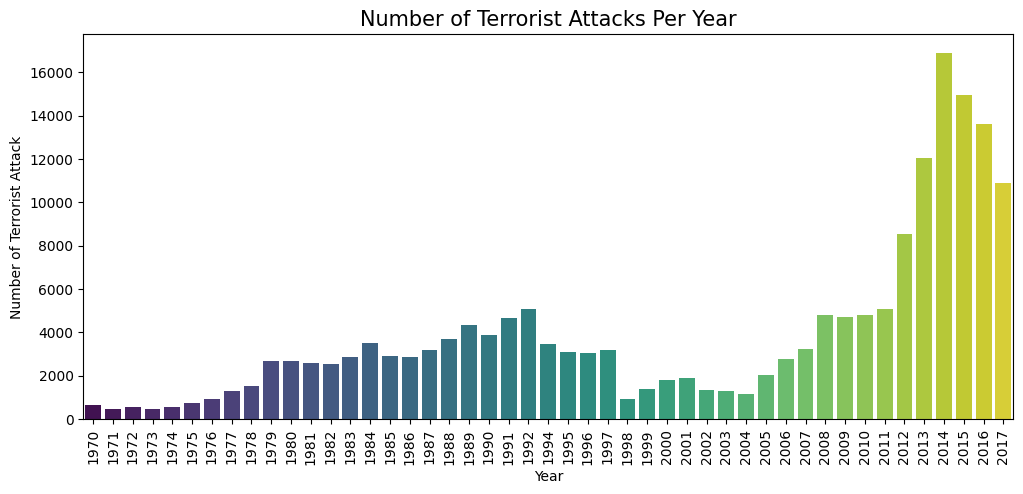

In [23]:
# Set figure size
plt.rcParams['figure.figsize'] = (12, 5)


ax = sns.countplot(x='iyear', data=df_1,palette='viridis')

ax.set(xlabel='Year', ylabel='Number of Terrorist Attack')
plt.xticks(rotation=90)
ax.set_title('Number of Terrorist Attacks Per Year', fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

This chart provides a clearer representation of the variation of terrorist attacks over the years.

##### 2. What is/are the insight(s) found from the chart?

In [24]:
# Calculate the count of terrorist attacks per year and store it as a dictionary.
count_year= df_1['iyear'].value_counts().to_dict()

# Calculate the percentage increase in attacks from 1970 to 2017.
rate= ((count_year[2017]-count_year[1970])/count_year[1970])* 100

# Print the counts of attacks in 1970 and 2017.
print(count_year[1970],'attacks happened in 1970 &',count_year[2017],'attacks happened in 2017')

# Print the percentage increase in attacks from 1970 to 2017.
print('So the number of attacks has increased by',np.round(rate,2),'% from 1970 to 2017')

651 attacks happened in 1970 & 10900 attacks happened in 2017
So the number of attacks has increased by 1574.35 % from 1970 to 2017


In [25]:
# Calculate the average number of terror attacks per year for the initial five years from 1970 to 1975.
terror_attack_first_5_years = df_1[df_1['iyear'] <= 1975]['iyear'].value_counts().mean()

# Display the calculated average number of terror attacks for the specified period
print(f"The average number of terror attacks per year for the first five years (1970-1975) is: {terror_attack_first_5_years}")

#Calculating Overall Average(1970-2017)
mean_of_terror_attack = df_1['iyear'].value_counts().mean()
print(f"The overall average number of terror attacks per year from 1970 to 2017 is: {mean_of_terror_attack}")

# Calculating the average number of terrorists attack per year for the last 5 years(2013-2017).
terror_attack_last_5_years = df_1[df_1['iyear'] >= 2013]['iyear'].value_counts().mean()

# Display the calculated average number of terror attacks for the specified period
print(f"The average number of terror attacks per year for the last five years (2013-2017) is: {terror_attack_last_5_years}")

The average number of terror attacks per year for the first five years (1970-1975) is: 580.6666666666666
The overall average number of terror attacks per year from 1970 to 2017 is: 3865.7659574468084
The average number of terror attacks per year for the last five years (2013-2017) is: 13678.2


### Insights found from the chart:
- 651 attacks happened in 1970 & 10900 attacks happened in 2017.
- So the number of attacks has increased by 1574.35 % from 1970 to 2017.
- The average number of terror attacks per year for the first five years (1970-1975) is: 580.6666666666666
- The overall average number of terror attacks per year from 1970 to 2017 is: 3865.7659574468084
- The average number of terror attacks per year for the last five years (2013-2017) is: 13678.2

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here.**

From the year 1970, there is a wave of rise in terrorist activities till 1992 then till 2004 there is a drop in terrorist activities and from 2004 to 2015 there is a steeper wave of rise in terrorist activities.

No there are no insights that to negative growth.

From the above pattern of waves of terrorist activities it seems that there could be possibility of drop in terrorist activities and again there is a rise in terrorist activities which is much steeper and larger than previous two waves.

Over the years, number of Terrorist attacks are increasing which means that measures taken to prevent attacks are not enough.

There need to be taken more preventive measures against these terrorist groups and smuggling of weapons.

#### Chart - 2  Top 30 countries via Number of attacks

<ipython-input-26-c5533e3999ed>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='country_txt', data=df_1,order=df_1['country_txt'].value_counts().index[:30], palette='colorblind')


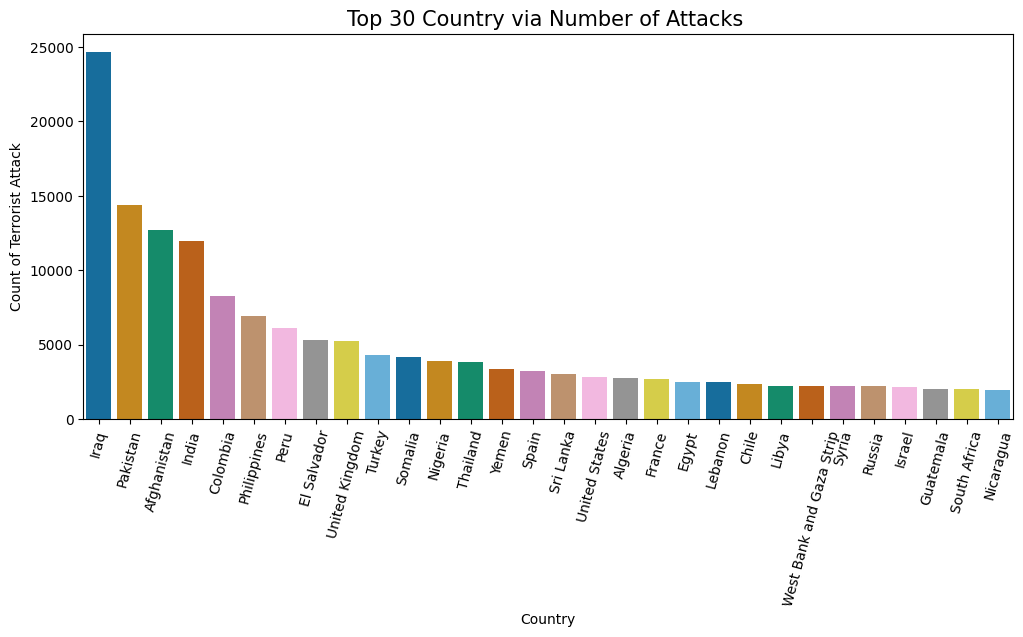

In [26]:
# Chart - 2 visualization code

ax= plt.rcParams['figure.figsize'] = (12, 5)


ax = sns.countplot(x='country_txt', data=df_1,order=df_1['country_txt'].value_counts().index[:30], palette='colorblind')

ax.set(xlabel='Country', ylabel='Count of Terrorist Attack')
plt.xticks(rotation=75)
ax.set_title('Top 30 Country via Number of Attacks ', fontsize=15)
plt.show()



 ##### 1. Why did you pick the specific chart?
 **Answer Here.**
 A bar graph, especially when ordered by count, effectively highlights this ranking and makes it easy to identify the countries with the most attacks.

 This is categorical data (countries) with a numerical value associated (number of attacks). Bar graphs excel at representing this type of data clearly.

2. What is/are the insight(s) found from the chart?

**Answer Here.**

- Iraq faces the highest number of terrorist attacks, followed by Pakistan, then Afghanistan.
- South Africa and Nicargua faces the least number of terrorist attacks.



#### Chart - 3  Region via Number of attacks

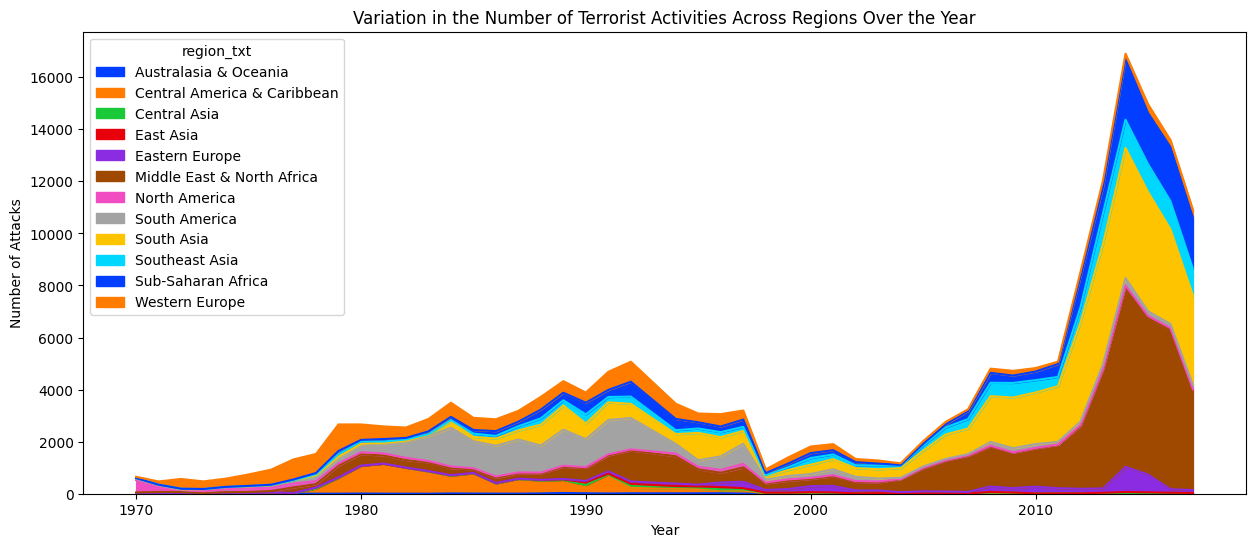

In [27]:
terror_region = pd.crosstab(df_1['iyear'],df_1['region_txt'])
terror_region.plot(color= sns.color_palette('bright',12),kind='area')
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.title('Variation in the Number of Terrorist Activities Across Regions Over the Year')
plt.ylabel('Number of Attacks')
plt.xlabel('Year')
plt.show()

##### 1. Why did you pick the specific chart?

**Answer Here.**

It effectively displays the overall trend of terrorist activities for each region over the years. The filled areas provide a clear visual representation of the rise and fall in the number of attacks.

#### Chart - 4   Most Frequent Used Weapons in Attacks

<ipython-input-28-d5eee9941fce>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='weaptype1_txt', data=df_1,order=df_1['weaptype1_txt'].value_counts().index[:6], palette='colorblind')


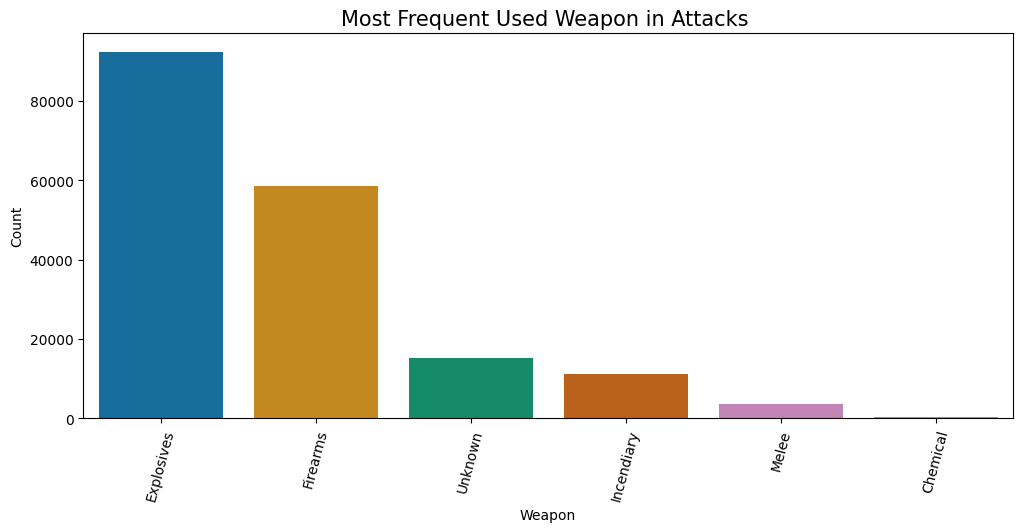

In [28]:
# Chart - 4 visualization code
ax= plt.rcParams['figure.figsize'] = (12, 5)


ax = sns.countplot(x='weaptype1_txt', data=df_1,order=df_1['weaptype1_txt'].value_counts().index[:6], palette='colorblind')

ax.set(xlabel='Weapon', ylabel='Count')
plt.xticks(rotation=75)
ax.set_title('Most Frequent Used Weapon in Attacks ', fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Because we are trying to visualize the count of different weapon types used in attacks.

##### 2. What is/are the insight(s) found from the chart?

Most frequent weapon used in terrorist attack is Explosives followed by Firearms and least used is chemical.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.

Knowing that explosives and firearms are the most common weapons used in terrorist attacks can inform strategies for:
- Increased focus on detecting and preventing the use of explosives and firearms.
-  Prioritizing efforts to track the acquisition and movement of these weapon types.
- Educating the public on the potential threats and how to respond.

Understanding the lower usage of chemical weapons, while still important, might suggest allocating resources proportionally to the threat levels posed by different weapon types.

 As such following the above strategies can lead to a positive impact on the growth of the business.

#### Chart - 5  Most Frequent Target of Terrorist.





<ipython-input-29-457cb8ca8f41>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='targtype1_txt', data=df_1,order=df_1['targtype1_txt'].value_counts().index, palette='flare')


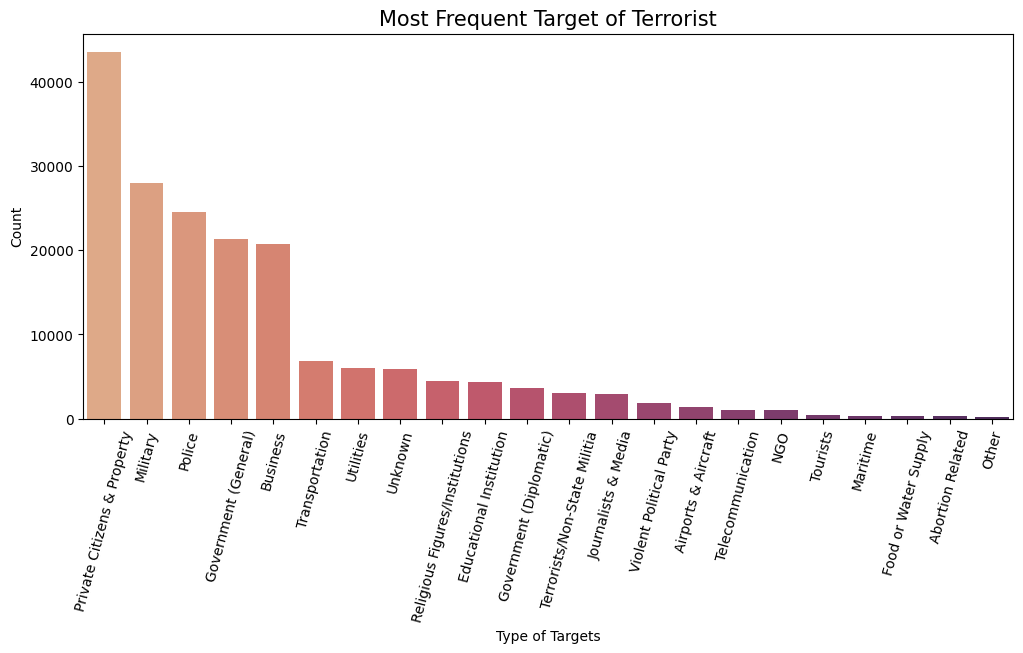

In [29]:
# Chart - 5 visualization code
ax= plt.rcParams['figure.figsize'] = (12, 5)


ax = sns.countplot(x='targtype1_txt', data=df_1,order=df_1['targtype1_txt'].value_counts().index, palette='flare')

ax.set(xlabel='Type of Targets', ylabel='Count')
plt.xticks(rotation=75)
ax.set_title('Most Frequent Target of Terrorist', fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Countplots allow for easy comparison of the frequency or count of each target type. This helps quickly identify the most and least targeted categories.

##### 2. What is/are the insight(s) found from the chart?

Most Frequent target of terrorist is Private Citizens & Property, followed by Military and then Police.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.

  Knowing that private citizens and property are the most frequent targets of terrorism highlights the widespread impact of these attacks and the need for comprehensive security measures.

This understanding can inform strategies for:
- Increased security measures in public areas, transportation hubs, and other places where people gather.
- Building partnerships between law enforcement and communities to enhance vigilance and response capabilities.

 This could help in creating a business with potential development and growth in these areas alongwith providing the citizens with employment opportunities.  


#### Chart - 6  Most Frequent Type of Attacks

<ipython-input-30-8c7d3f9f0e57>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='attacktype1_txt', data=df_1,order=df_1['attacktype1_txt'].value_counts().index, palette='flare')


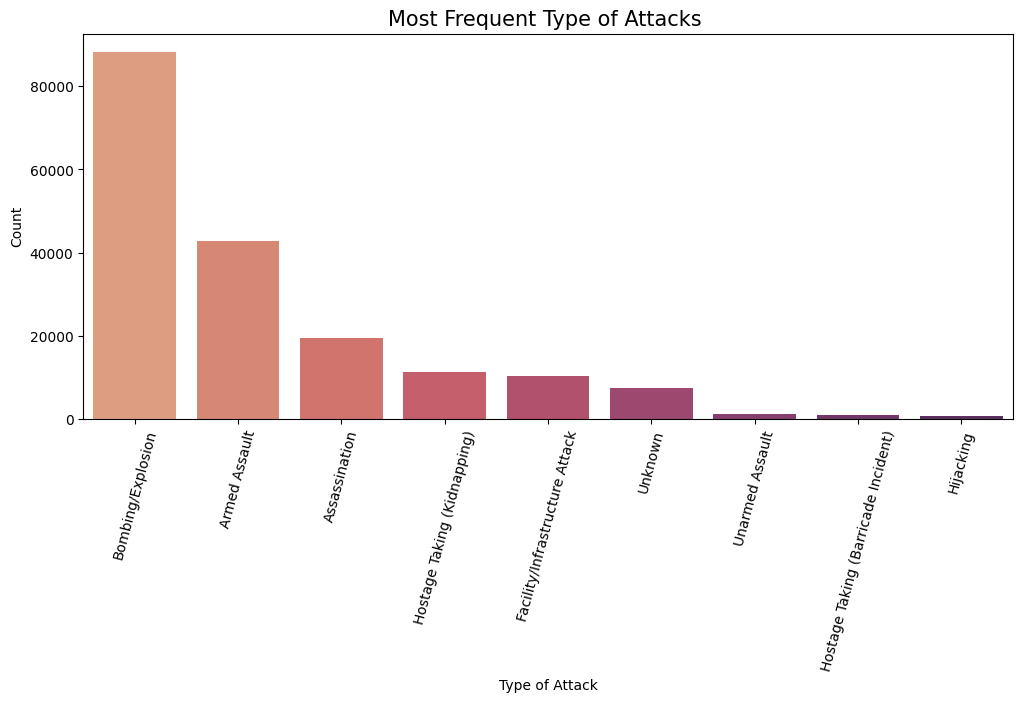

In [30]:
# Chart - 6 visualization code
ax= plt.rcParams['figure.figsize'] = (12, 5)


ax = sns.countplot(x='attacktype1_txt', data=df_1,order=df_1['attacktype1_txt'].value_counts().index, palette='flare')

ax.set(xlabel='Type of Attack', ylabel='Count')
plt.xticks(rotation=75)
ax.set_title('Most Frequent Type of Attacks ', fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

The bar chart format of a countplot provides a clear and intuitive way to see the distribution of attack types, making it easy to understand the patterns in your data.
This helps identify the most and least common attack methods.

##### 2. What is/are the insight(s) found from the chart?

Most frequent type of attack is Bombing/Explosion, followed by Armed Assault and then Assasination.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:

A positive business impact can be created by following strategies like:
- Enhancing security measures focused on detecting and preventing the use of explosives in public spaces and critical infrastructure.
- Developing and practicing response protocols for armed assaults, including training for law enforcement and public awareness campaigns.
- Implementing security measures specifically designed to mitigate the risk of assassinations, particularly for high-profile individuals or potential targets.


In [31]:
df_1['gname'].value_counts()

gname
Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Ansar Sarallah                                          1
Sword of Islam                                          1
Support of Ocalan-The Hawks of Thrace                   1
Arab Revolutionary Front                                1
MANO-D                                                  1
Name: count, Length: 3537, dtype: int64

#### Chart - 7  Most Number of Attacks Done By Terrorist Organisation

<ipython-input-32-5750e92d5d6e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='gname', data=df_1,order=df_1['gname'].value_counts().index[1:50], palette='flare')


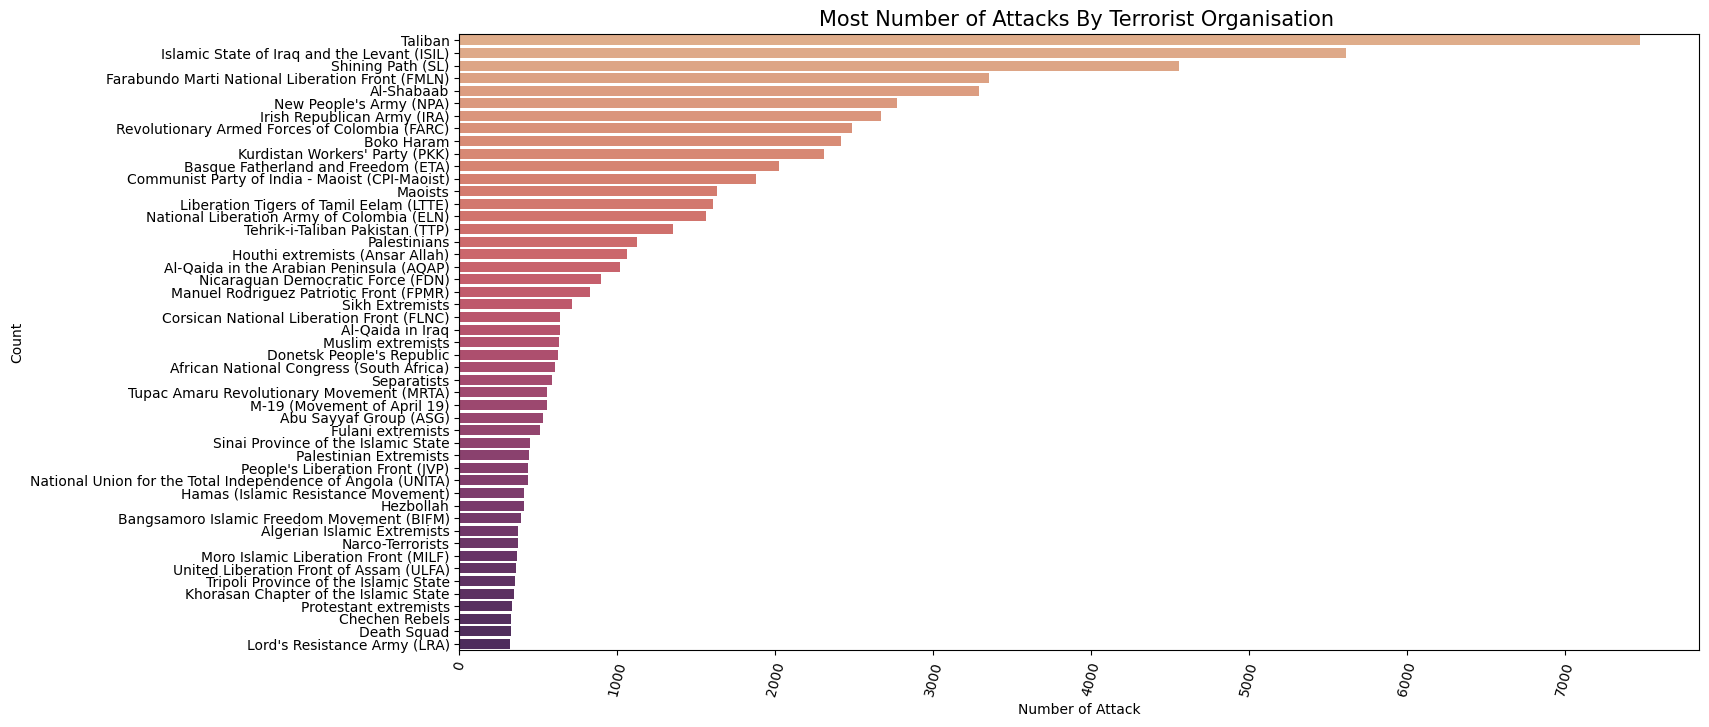

In [32]:
# Chart - 7 visualization code
ax= plt.rcParams['figure.figsize'] = (16, 8)


ax = sns.countplot(y='gname', data=df_1,order=df_1['gname'].value_counts().index[1:50], palette='flare')

ax.set(xlabel='Number of Attack', ylabel='Count')
plt.xticks(rotation=75)
ax.set_title('Most Number of Attacks By Terrorist Organisation ', fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

By using a countplot, you can easily compare the number of attacks attributed to each terrorist organization, allowing us to identify the most active groups.

 Ordering the groups by their attack count provides a clear visual representation of the most prolific organizations, aiding in prioritizing counter-terrorism efforts.

##### 2. What is/are the insight(s) found from the chart?

Most number of terrorist attacks done by Taliban, followed by Islamic State Of Iraq And Levant(ISIL), and then by Shining Path(SL).

We can say that Taliban is the most active terrorist organization.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.

 Taliban as the most active terrorist organization based on the number of attacks emphasizes the need for focused counter-terrorism strategies to address this specific threat.

This knowledge can inform:

- Intelligence Gathering: Prioritizing efforts to monitor and understand the Taliban's activities, networks, and capabilities.
-Targeted Disruption: Developing strategies to disrupt the Taliban's operations, including financial networks, recruitment efforts, and logistical support.
-International Collaboration: Strengthening partnerships with regional and international allies to coordinate counter-terrorism efforts against the Taliban.

While other groups like ISIL and Shining Path also pose significant threats, recognizing the Taliban's high level of activity allows for a more targeted and effective allocation of resources.

Following the above strategies can help create a positive business impact.

In [33]:
print('\n')
print(('*')*20)
print('Value count of Object Type Category which if greater than 50')
print('\n')
print(('*')*20)
cat_col= df_1.select_dtypes('object').columns.to_list()
for col in cat_col:
  if len(df_1[col].value_counts()) < 50:
    print(df_1[col].value_counts())
    print('\n')
    print(('*')*20)



********************
Value count of Object Type Category which if greater than 50


********************
region_txt
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: count, dtype: int64


********************
attacktype1_txt
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking    

#### Chart - 8  Showing Successful Terrorist Attack

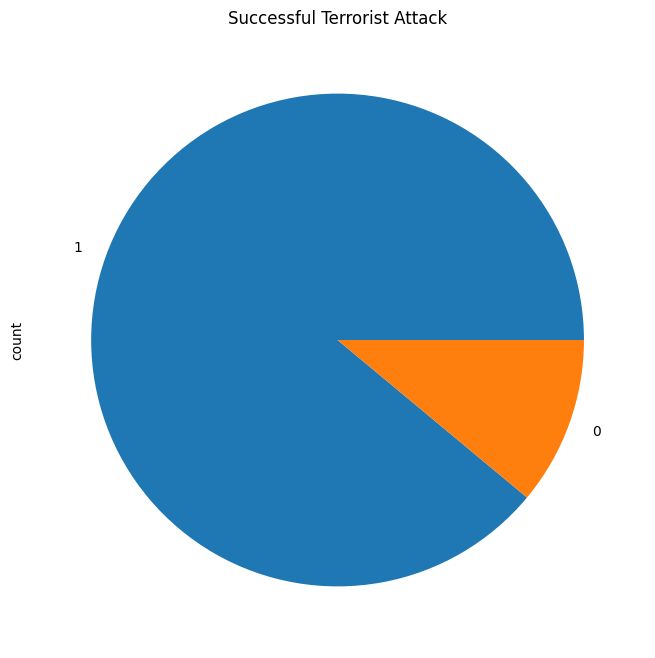

In [34]:
# Chart - 8 visualization code
ax= df_1['success'].value_counts().plot(kind='pie')
ax.set_title('Successful Terrorist Attack',fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9  Number of Multiple Attack

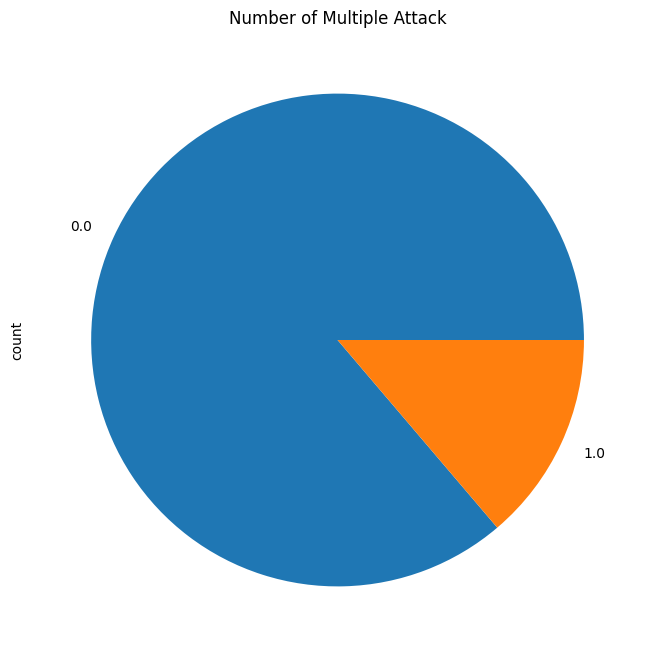

In [35]:
# Chart - 9 visualization code
ax= df_1['multiple'].value_counts().plot(kind='pie')
ax.set_title('Number of Multiple Attack',fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10  Number Of Suicide Attack

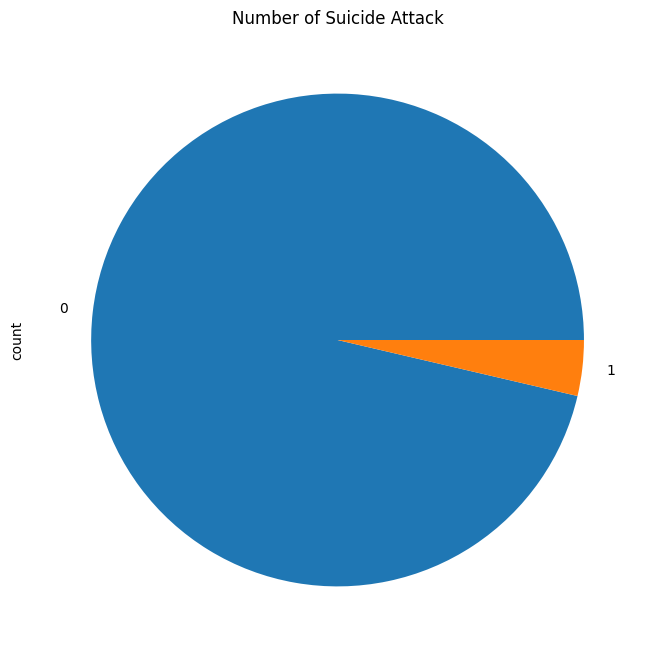

In [36]:
# Chart - 10 visualization code
ax= df_1['suicide'].value_counts().plot(kind='pie')
ax.set_title('Number of Suicide Attack',fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

# Countries Performance Against Terrorist Attacks

In [37]:
success_country= df_1.groupby('country_txt').agg({'eventid':'count','success':'sum'}).reset_index()
success_country.columns=['Country','Total_Attacks','Attack_Success']
success_country['Attack_Failed']=success_country['Total_Attacks']-success_country['Attack_Success']
success_country['Failure_Rate_Attack']=(success_country['Attack_Failed']/success_country['Total_Attacks'])*100
success_country['Success_Rate_Attack']=(success_country['Attack_Success']/success_country['Total_Attacks'])*100
success_country= success_country.round(2)


## Top 10 Countries Able to Successfully Tackle Terrorist Attack

<ipython-input-38-b81dbb655925>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='Country',y='Failure_Rate_Attack',data=plot_able_stop_terror_attack,palette='viridis')


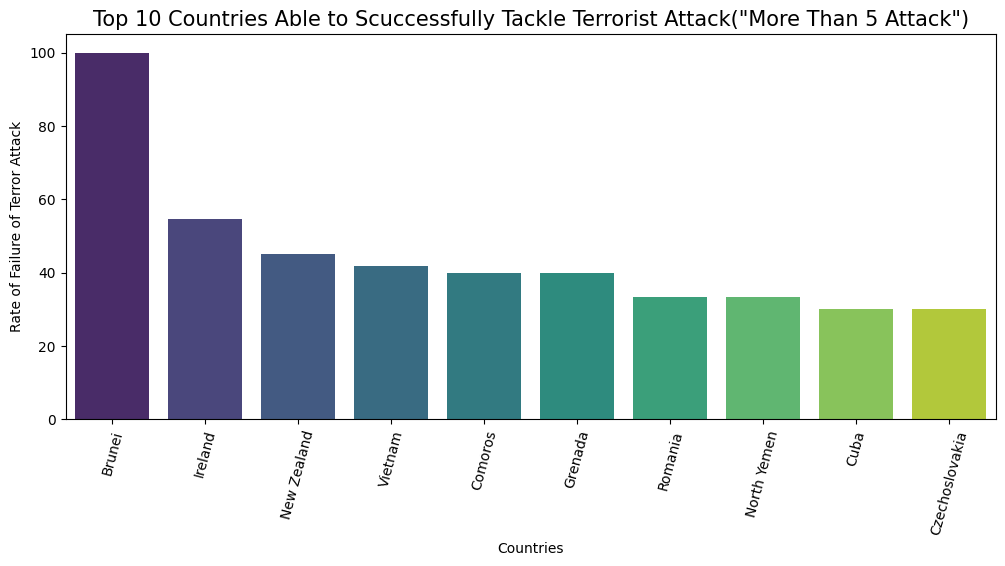

In [38]:
able_stop_terror_attack = success_country[success_country['Total_Attacks']>=5].sort_values('Failure_Rate_Attack',ascending=False)[:10]
plot_able_stop_terror_attack = able_stop_terror_attack.loc[:,['Country','Failure_Rate_Attack']]
ax=plt.rcParams['figure.figsize']=12,5
ax=sns.barplot(x='Country',y='Failure_Rate_Attack',data=plot_able_stop_terror_attack,palette='viridis')
ax.set(xlabel='Countries', ylabel='Rate of Failure of Terror Attack')
plt.xticks(rotation=75)
ax.set_title('Top 10 Countries Able to Scuccessfully Tackle Terrorist Attack("More Than 5 Attack")', fontsize=15)
plt.show()



Country who successfully tackle terrorist attack is Brunei, followed by Ireland and then by New Zealand.

## Top 10 Countries Unable to Tackle Terrorist Attack

<ipython-input-39-7e7d2cdf595c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='Country',y='Success_Rate_Attack',data=plot_unable_stop_terror_attack,palette='viridis')


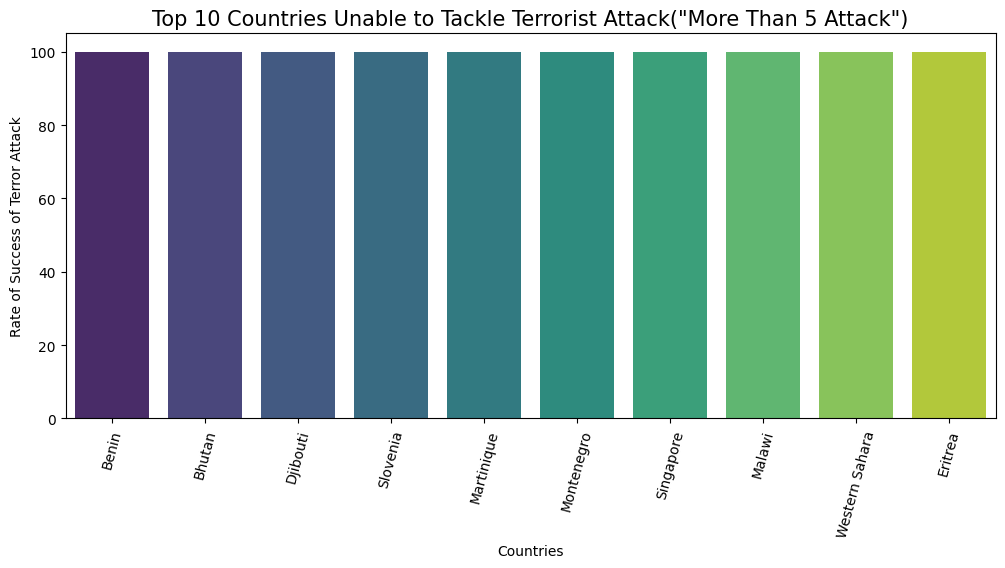

In [39]:
unable_stop_terror_attack = success_country[success_country['Total_Attacks']>=5].sort_values('Success_Rate_Attack',ascending=False)[:10]
plot_unable_stop_terror_attack = unable_stop_terror_attack.loc[:,['Country','Success_Rate_Attack','Total_Attacks']]
ax=plt.rcParams['figure.figsize']=12,5
ax=sns.barplot(x='Country',y='Success_Rate_Attack',data=plot_unable_stop_terror_attack,palette='viridis')
ax.set(xlabel='Countries', ylabel='Rate of Success of Terror Attack')
plt.xticks(rotation=75)
ax.set_title('Top 10 Countries Unable to Tackle Terrorist Attack("More Than 5 Attack")', fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Country which is not able to tackle terrorist attack is Benin(South Africa), followed by Bhutan and then by Djibouti(East Africa).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

## Trends in Terrorist Attack

In [40]:
attack_per_year=df_1.groupby(['iyear','targtype1_txt','target1','success','weaptype1_txt','gname'])['eventid'].count().to_frame(name='Total_Attacks').reset_index()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/

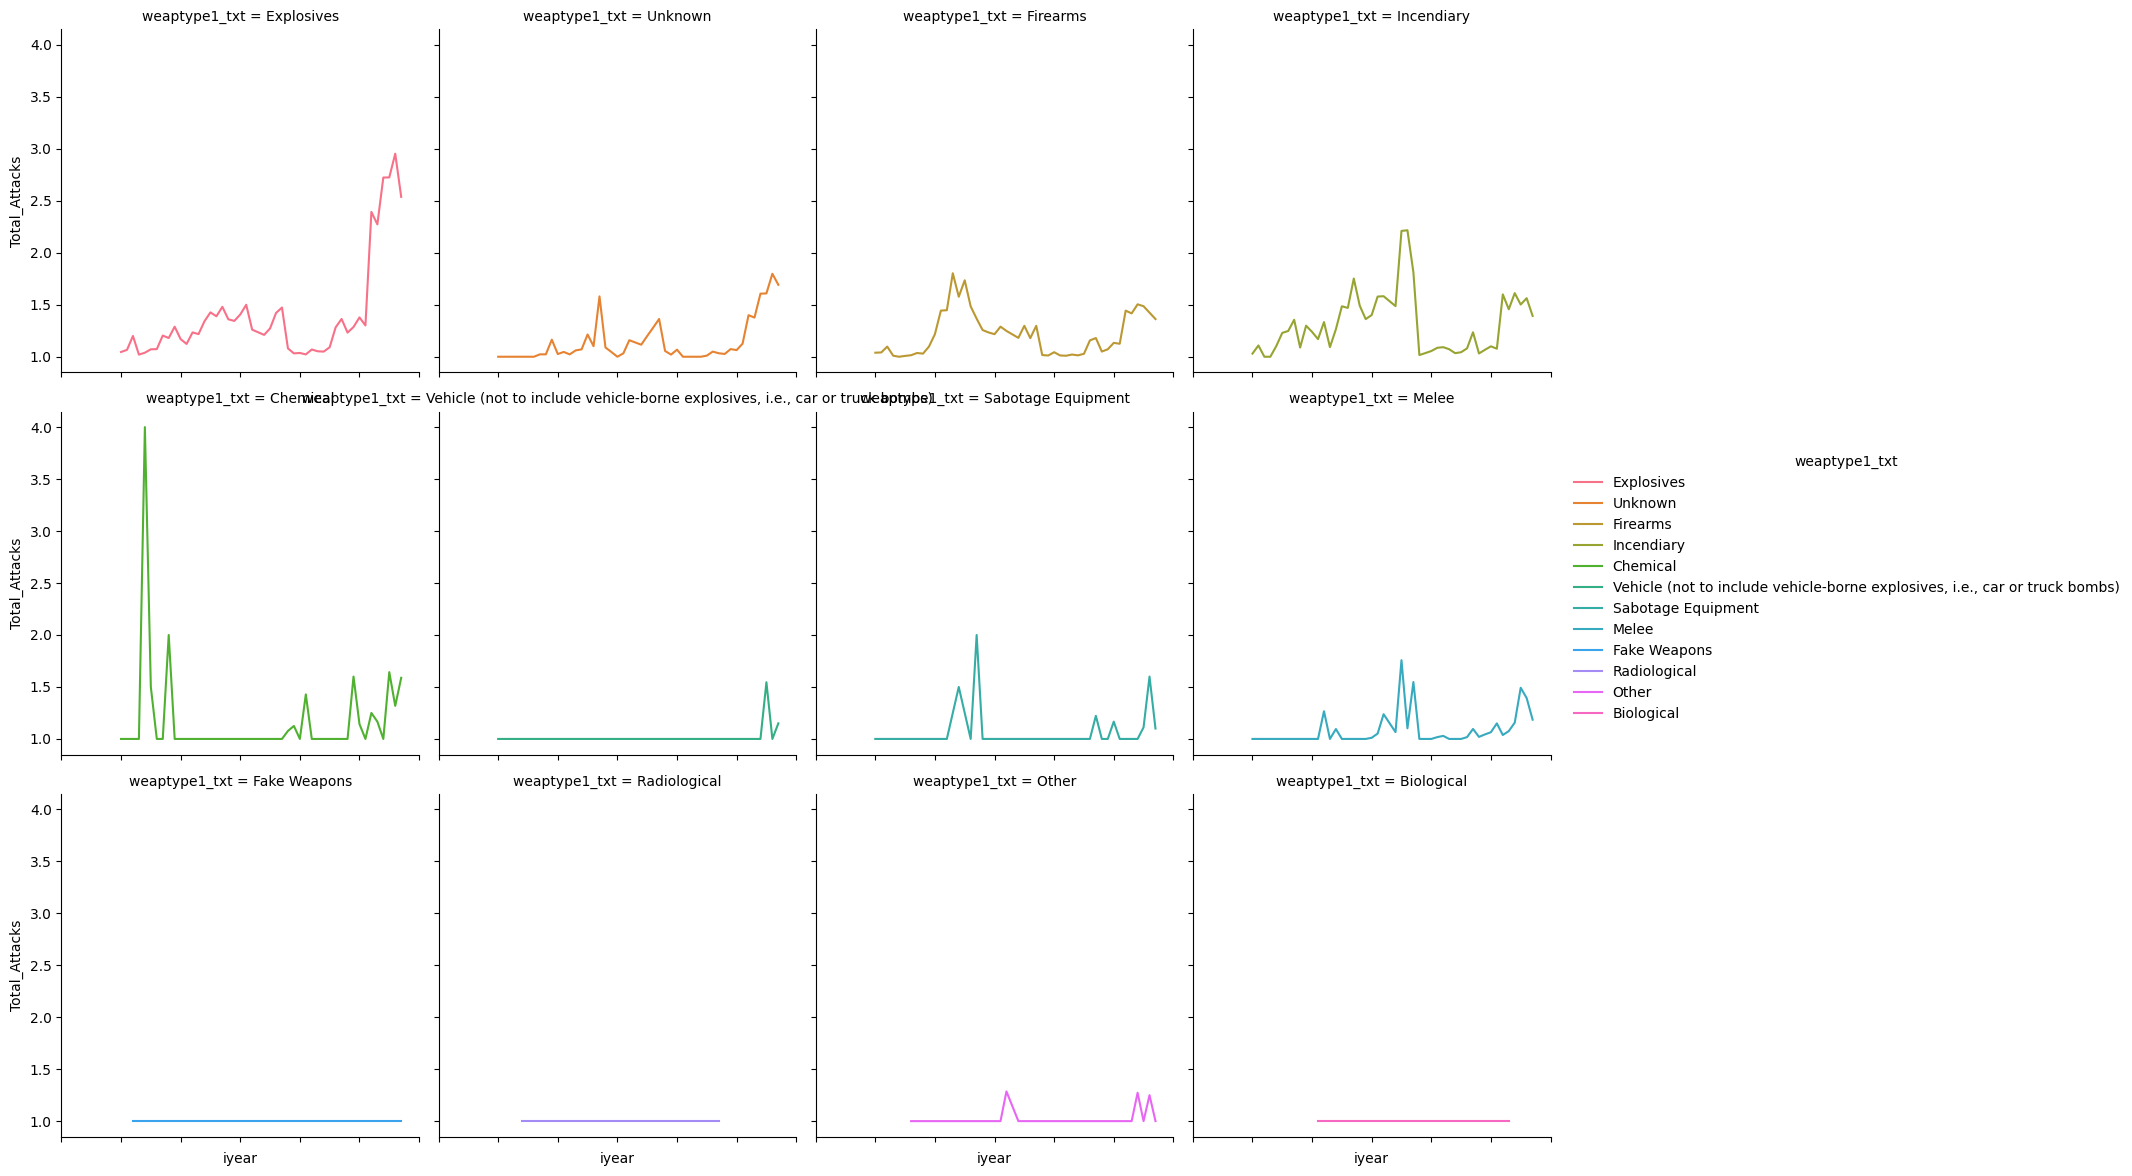

In [41]:
ax= sns.relplot(col="weaptype1_txt",y="Total_Attacks",col_wrap=4,hue='weaptype1_txt',x="iyear",kind='line',ci=None,data=attack_per_year,height=4,aspect=1)
ax.set_xticklabels(rotation=45)
plt.show()

#### Chart - 12

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/

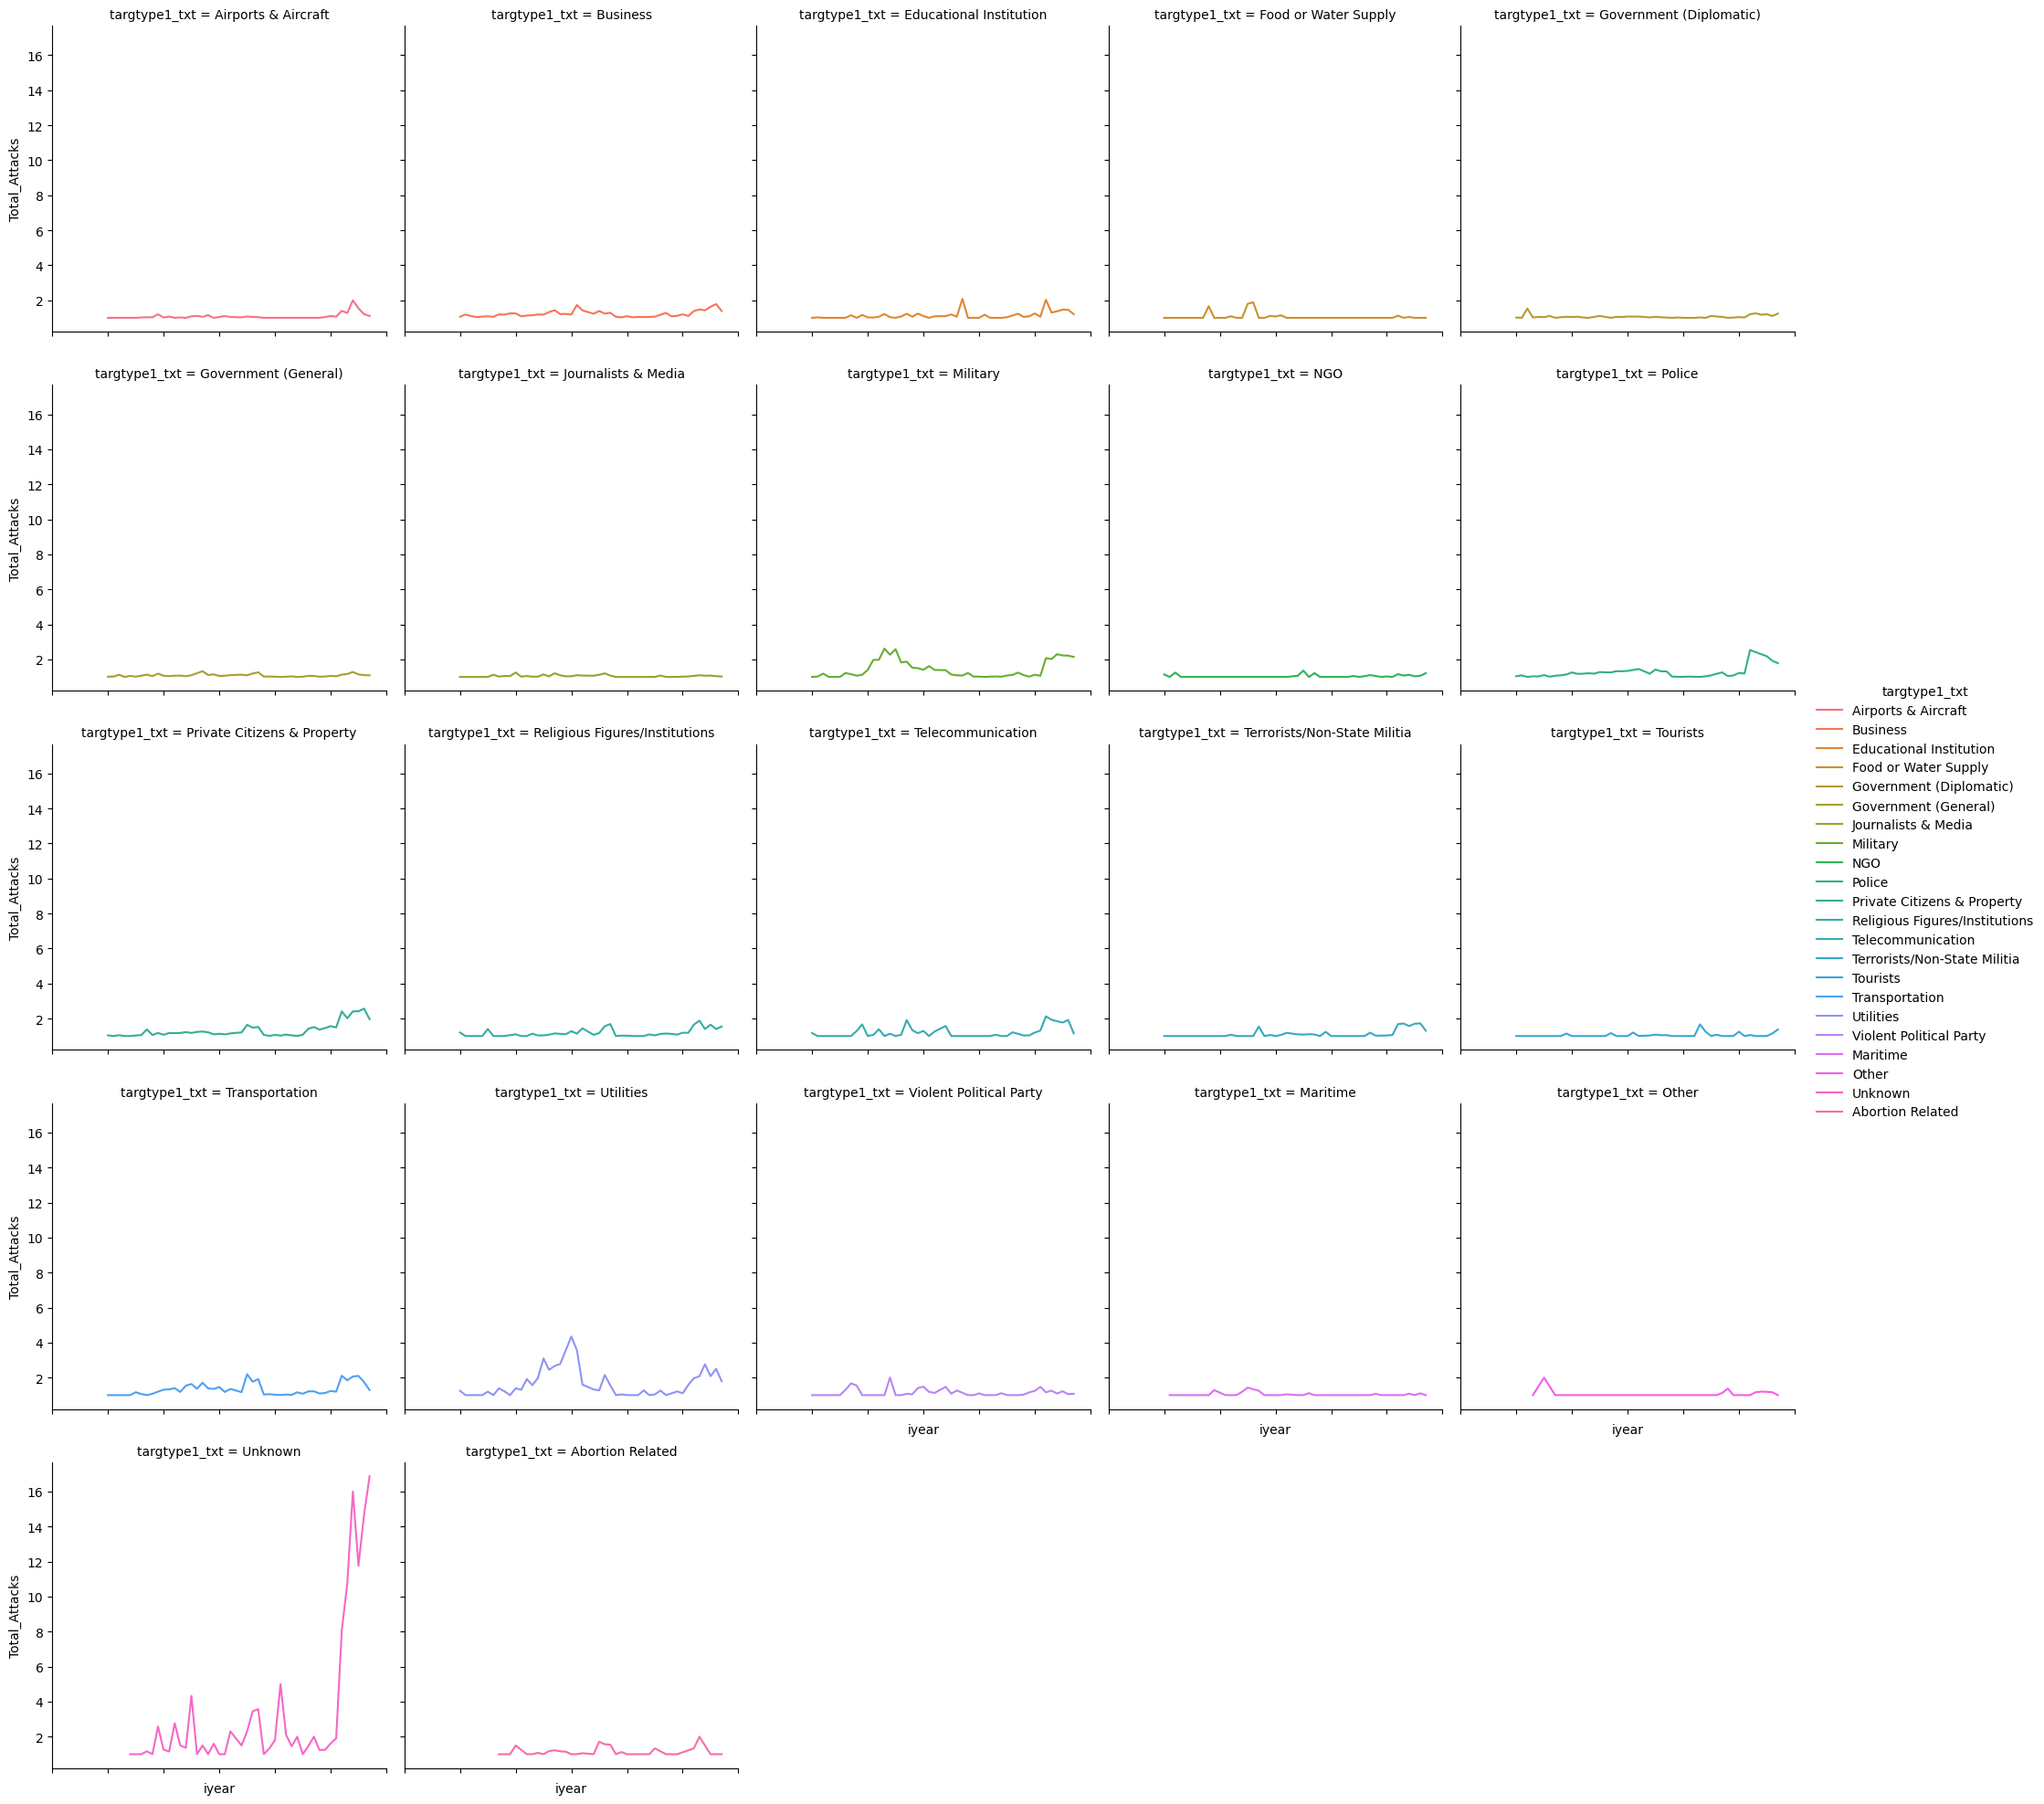

In [42]:
# Chart - 12 visualization code
ax= sns.relplot(col="targtype1_txt",y="Total_Attacks",col_wrap=5,hue='targtype1_txt',x="iyear",kind='line',ci=None,data=attack_per_year,height=4,aspect=1)
ax.set_xticklabels(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

<ipython-input-43-275024131177>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(x="iyear",y="Total_Attacks",hue='success',ci=None,data=attack_per_year)


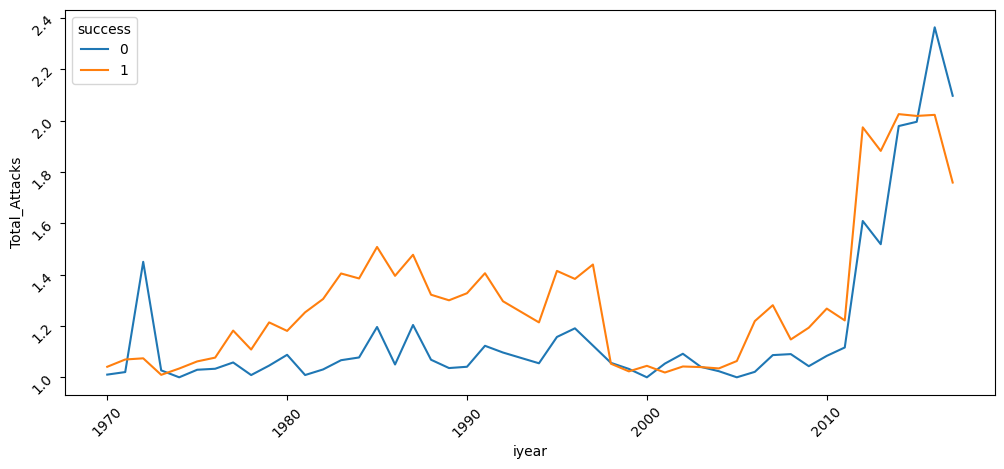

In [43]:
# Chart - 13 visualization code
ax = sns.lineplot(x="iyear",y="Total_Attacks",hue='success',ci=None,data=attack_per_year)
ax.tick_params(rotation=45)
plt.show()

<ipython-input-44-ddfa777fc7cf>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(x="iyear",y="Total_Attacks",ci=None,data=attack_per_year)


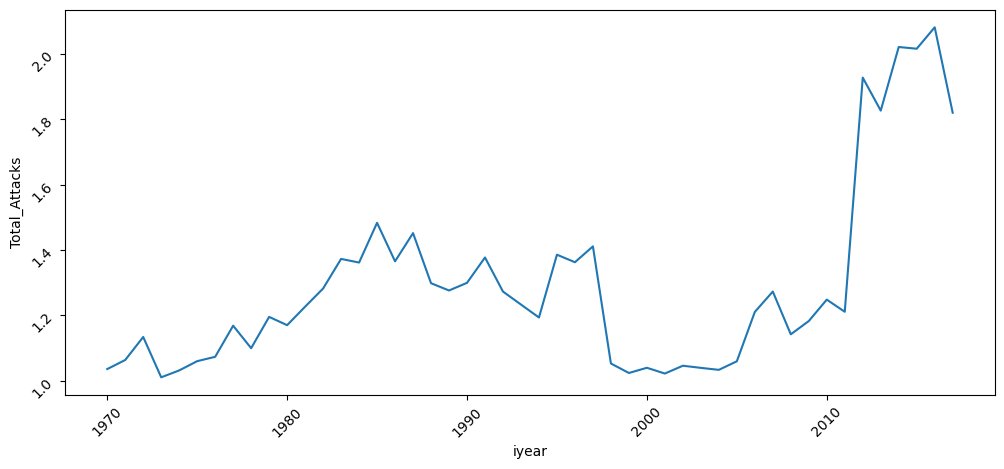

In [44]:
ax = sns.lineplot(x="iyear",y="Total_Attacks",ci=None,data=attack_per_year)
ax.tick_params(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [45]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [46]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***